In [1]:
# Preamble

from astropy.table import Table, column
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
# better-looking plots
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

In [2]:
import sys
sys.path.append('../../../astro_codes/')

In [36]:
# Load the required data

samples = Table.read('../matched_fits/samples.fits')
bad_flux_masks = Table.read('../matched_fits/bad_flux_mask.fits')

sfr_matched = Table.read('../matched_fits/sfrs.fits')
chang_out = Table.read('../matched_fits/chang_out_matched.fits')

s16_shallow = Table.read('../matched_fits/s16_shallow_matched.fits')
s16_medium = Table.read('../matched_fits/s16_medium_matched.fits')
s16_deep = Table.read('../matched_fits/s16_deep_matched.fits')

mpa_sfrs = Table.read('../matched_fits/mpa_sfrs_matched.fits')
mpa_i = Table.read('../matched_fits/mpa_i_matched.fits')
mpa_masses = Table.read('../matched_fits/mpa_masses_matched.fits')

## Salim+16?

In [21]:
from scipy.optimize import curve_fit

def linear(m,x,c):
    return m*x + c

in_sample = ((samples['in_redshift']) & (bad_flux_masks['fuv']) &  (samples['in_wise']) &
             (bad_flux_masks['nuv']) & (bad_flux_masks['w4']) & (s16_medium['mask']))

masses = chang_out['lmass50_all']
s16_sfrs = s16_medium['logsfr']
measured_sfrs = sfr_matched['total']
s16_ssfrs, measured_ssfrs = [sfrs - masses for sfrs in [s16_sfrs,measured_sfrs]]

in_sample = (in_sample) & (measured_ssfrs <= 0) & (s16_ssfrs <= 0)

/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


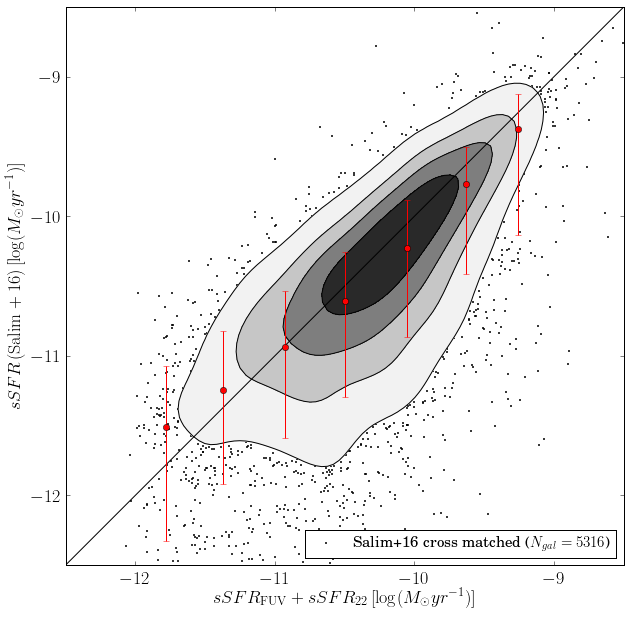

In [22]:
from bin_statistics import assign_bins, stats_functions
from contours import kde_contour

y = s16_ssfrs[in_sample]
x = measured_ssfrs[in_sample]

x_bins = assign_bins(x,(-13,-9),False,11)

figure = plt.figure(figsize=(10,10))

x_plot = stats_functions().median_and_percentile(x,x_bins)
y_plot = stats_functions().median_and_percentile(y,x_bins)

yerrs = (y_plot['median']-y_plot['16 percentile'],y_plot['84 percentile']-y_plot['median'])

_ = kde_contour(x,y,fill=True,zorder=1)
_ = plt.plot(x,y,'.',zorder=0,rasterized=True,markersize=3,color='k',
             label='Salim+16 cross matched ($N_{{gal}}={}$)'.format(len(x)))
plt.axis((-12.5,-8.5,-12.5,-8.5))

_ = plt.errorbar(x_plot['median'],y_plot['median'],yerrs,fmt='o',color='r',zorder=3)
_ = plt.plot([-8,-13],[-8,-13],'k-',zorder=2)

plt.ylabel('$sSFR \, \mathrm{(Salim+16)} \, [\log(M_\odot yr^{-1})]$')
plt.xlabel('$sSFR_\mathrm{FUV} + sSFR_\mathrm{22} \, [\log(M_\odot yr^{-1})]$')
_ = plt.xticks([-12,-11,-10,-9])
_ = plt.yticks([-12,-11,-10,-9])
plt.legend(fontsize=15,loc='lower right',numpoints=1)
#plt.savefig('../output_figures/ssfr_comparison.pdf')

MAD = 0.2800504487751283
MAD = 0.25882818599714685
SpearmanrResult(correlation=0.63968664583157608, pvalue=0.0)
0.128867652194


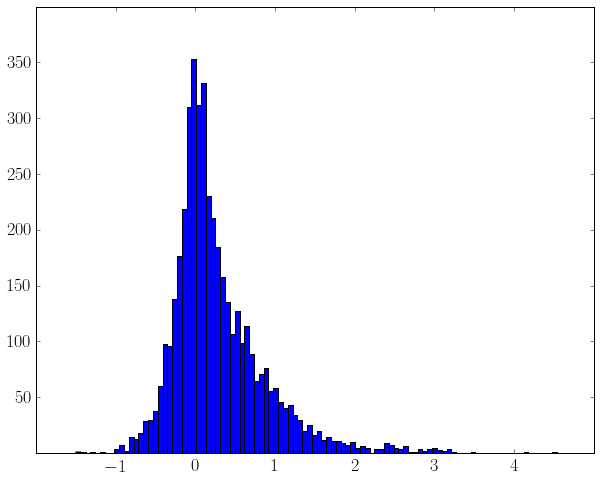

In [24]:
mad = np.median(np.abs(x-y))
print('MAD = {}'.format(mad))

ok_sfr = x >= -11
offset = x[ok_sfr]-y[ok_sfr]
mad_less = np.median(np.abs(offset))
print('MAD = {}'.format(mad_less))

from scipy.stats import pearsonr, spearmanr
print(spearmanr(x[ok_sfr],y[ok_sfr]))

_ = plt.hist(offset,bins=100)
print(np.median(offset))

In [7]:
# Q: how many galaxies do we lose by making a cut in ssfr?

samples = Table.read('../matched_fits/samples.fits')
ml_spirals = (samples['in_mass_limit']) & (samples['axial_ok']) & (samples['in_spiral'])

ssfr_limits = np.linspace(-11.5,-10.5,21)
N_gal = []
for ssfr_limit in ssfr_limits:
    in_ssfr = measured_ssfrs > ssfr_limit
    N_gal.append(np.sum(ml_spirals*in_ssfr))

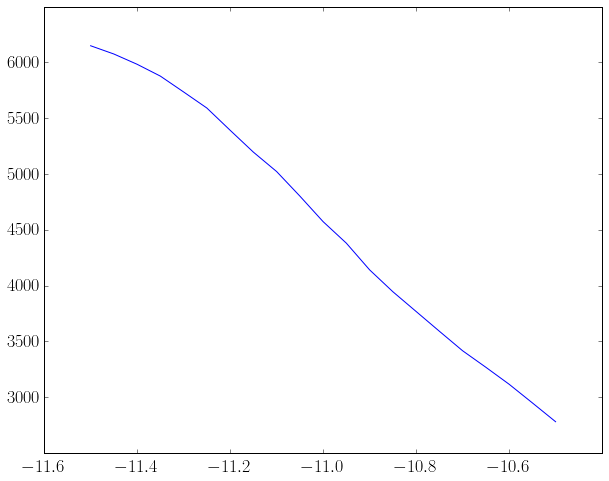

In [8]:
_ = plt.plot(ssfr_limits,np.array(N_gal))

## MPA-JHU?

In [17]:
print(mpa_i,mpa_sfrs)

 mask I_CLASS PLATE    MJD   FIBERID     SPECOBJID           OBJID      
----- ------- ------ ------- ------- ----------------- -----------------
 True     3.0  954.0 52405.0   360.0 2.68470758765e+17 5.87732591715e+17
 True     4.0  552.0 51992.0   342.0 1.55597492518e+17 5.88009368546e+17
 True     4.0  970.0 52413.0   470.0 2.73255841502e+17  5.8773248436e+17
 True     5.0 2233.0 53845.0   450.0 6.28764887396e+17 5.87741723357e+17
 True    -1.0 1749.0 53357.0   423.0 4.92528902611e+17 5.87738410867e+17
 True    -1.0  816.0 52379.0   320.0  2.2990854843e+17 5.87729751132e+17
 True    -1.0 1174.0 52782.0   475.0 3.30678321614e+17 5.87733608555e+17
 True     4.0 1406.0 52876.0   132.0   3.959809185e+17 5.87735742618e+17
 True    -1.0 2021.0 53475.0   112.0 5.69090601778e+17 5.87738574069e+17
 True     4.0 1019.0 52707.0   340.0 2.87049377535e+17 5.87731870709e+17
  ...     ...    ...     ...     ...               ...               ...
False  -999.0 -999.0  -999.0  -999.0            -99

In [15]:
in_sample = ((samples['in_redshift']) & (bad_flux_masks['fuv']) &  (samples['in_wise']) &
             (bad_flux_masks['nuv']) & (bad_flux_masks['w4']) & (mpa_sfrs['mask']) & 
             ((mpa_i['I_CLASS'] == 1) | (mpa_i['I_CLASS'] == 2)))

in_sample = (in_sample) & (measured_ssfrs <= 0) & (s16_ssfrs <= 0)

masses = chang_out['lmass50_all']
s16_sfrs = mpa_sfrs['MEDIAN']
measured_sfrs = sfr_matched['total']
s16_ssfrs, measured_ssfrs = [sfrs - masses for sfrs in [s16_sfrs,measured_sfrs]]

/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


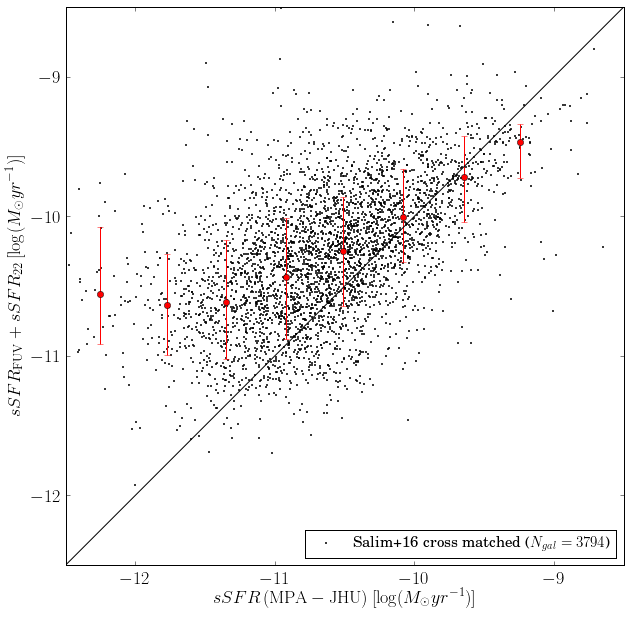

In [18]:
x = s16_ssfrs[in_sample]
y = measured_ssfrs[in_sample]

x_bins = assign_bins(x,(-13,-9),False,11)

figure = plt.figure(figsize=(10,10))

from bin_statistics import assign_bins, stats_functions
from contours import kde_contour

x_plot = stats_functions().median_and_percentile(x,x_bins)
y_plot = stats_functions().median_and_percentile(y,x_bins)

yerrs = (y_plot['median']-y_plot['16 percentile'],y_plot['84 percentile']-y_plot['median'])

#_ = kde_contour(x,y,fill=True,zorder=1)
_ = plt.plot(x,y,'.',zorder=0,rasterized=True,markersize=3,color='k',
             label='Salim+16 cross matched ($N_{{gal}}={}$)'.format(len(x)))
plt.axis((-12.5,-8.5,-12.5,-8.5))

_ = plt.errorbar(x_plot['median'],y_plot['median'],yerrs,fmt='o',color='r',zorder=2)
_ = plt.plot([-8,-13],[-8,-13],'k-')

plt.xlabel('$sSFR \, \mathrm{(MPA-JHU)} \, [\log(M_\odot yr^{-1})]$')
plt.ylabel('$sSFR_\mathrm{FUV} + sSFR_\mathrm{22} \, [\log(M_\odot yr^{-1})]$')
_ = plt.xticks([-12,-11,-10,-9])
_ = plt.yticks([-12,-11,-10,-9])
plt.legend(fontsize=15,loc='lower right',numpoints=1)
#plt.savefig('../output_figures/ssfr_comparison.pdf')

### What are we doing here?

We effectively have four different methods for quantifying the SFR of our galaxies, and we want to check for consistency.

1. MPA-JHU
2. SED fitting of UV --> optical (Salim_16)
3. SED fitting of MIR (salim+16)
4. SED fitting of optical --> MIR (Chang+15)
5. UV+MIR fitting (Jarrett+13)

Note that the situation is slightly more complex though: Salim+16 has three different depths of UV data, and the shallowest one has a caveat that the fitting is _only_ reliable for the highest sSFR galaxies (sSFR > -11). Additionally, MPA-JHU measurements were _corrected_ based on an older version of the Salim+16 method (Salim+07), so again, these _should_ be tied together anyway- just because MPA-JHU and Salim+16 agree, doesn't mean they are necessarily 'correct'. 

In [37]:
# firstly, mask for the samples that we have an interest in:
in_sample = samples['in_vmax_limit']
print('{} of our galaxies to check'.format(np.sum(in_sample)))

35747 of our galaxies to check


In [38]:
# check the stellar mass estimates:
masses = Table()
masses['mpa'] = mpa_masses['MEDIAN'] - 0.03 # Kroupa -> Chabrier
masses['chang'] = chang_out['lmass50_all']
masses['s16_deep'] = s16_deep['logmstar']
masses['s16_medium'] = s16_medium['logmstar']
masses['s16_shallow'] = s16_shallow['logmstar']

sfrs = Table()
sfrs['mpa'] = mpa_sfrs['MEDIAN'] - 0.03 # Kroupa -> Chabrier
sfrs['chang'] = chang_out['lsfr50_all']
sfrs['s16_deep'] = s16_deep['logsfr']
sfrs['s16_medium'] = s16_medium['logsfr']
sfrs['s16_shallow'] = s16_shallow['logsfr']
sfrs['s16_deep_wise'] = s16_deep['logsfr_mir_wise']
sfrs['s16_medium_wise'] = s16_medium['logsfr_mir_wise']
sfrs['s16_shallow_wise'] = s16_shallow['logsfr_mir_wise']
sfrs['j13'] = sfr_matched['total']

ssfrs = Table()
ssfrs['mpa'] = sfrs['mpa'] - masses['mpa']
ssfrs['chang'] = sfrs['chang'] - masses['chang']
ssfrs['s16_deep'] = s16_deep['logsfr'] - masses['s16_deep']
ssfrs['s16_medium'] = s16_medium['logsfr'] - masses['s16_medium']
ssfrs['s16_shallow'] = s16_shallow['logsfr'] - masses['s16_shallow']
ssfrs['s16_deep_wise'] = s16_deep['logsfr_mir_wise'] - masses['s16_deep']
ssfrs['s16_medium_wise'] = s16_medium['logsfr_mir_wise'] - masses['s16_medium']
ssfrs['s16_shallow_wise'] = s16_shallow['logsfr_mir_wise'] - masses['s16_shallow']
ssfrs['j13'] = sfr_matched['total'] - masses['chang']

# Create some masks:

masks = Table()
masks['mpa'] = sfrs['mpa'] > -5
masks['chang'] = sfrs['chang'] > -10
masks['s16_shallow'] = (ssfrs['s16_shallow'] > -11) & (ssfrs['s16_shallow'] < -1) # poor performance on sSFRs < -11 (S+16)
masks['s16_medium'] = (ssfrs['s16_medium'] > -20) & (ssfrs['s16_medium'] < -1)
masks['s16_deep'] = (ssfrs['s16_deep'] > -20) & (ssfrs['s16_deep'] < -1)
masks['j13'] =  (bad_flux_masks['fuv']) & (bad_flux_masks['w4'])

10267 galaxies X-matched
8705 galaxies X-matched

/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


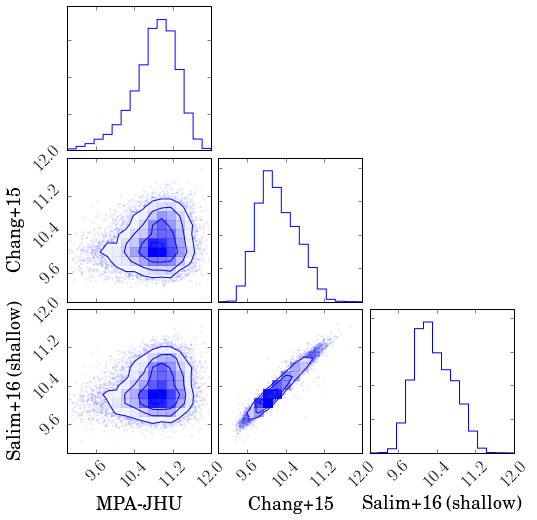

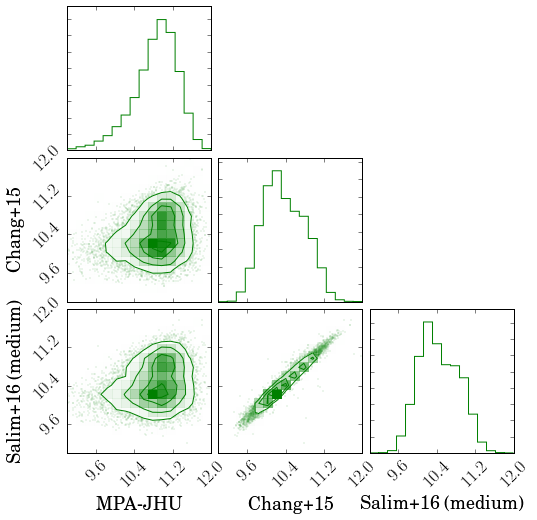

In [40]:
# Firstly, compare the stellar masses:
from corner import corner
#--------------------- Shallow depth -------------------------

ok_all = ((in_sample) & 
          (masks['mpa']) & 
          (masks['chang']) & 
          (masks['s16_shallow']))

print('{} galaxies X-matched'.format(np.sum(ok_all)))

xs = (np.array([masses['chang'],masses['mpa'],masses['s16_shallow']]).T)[ok_all]
ranges = [(9,12),(9,12),(9,12)]
bins = [16,16,16]
labels = ['MPA-JHU','Chang+15','Salim+16 (shallow)']
_ = corner(xs,range=ranges,bins=bins,color='b',labels=labels)

#--------------------- Medium depth -------------------------
ok_all = ((in_sample) & 
          (masks['mpa']) & 
          (masks['chang']) & 
          (masks['s16_medium']))

print('{} galaxies X-matched'.format(np.sum(ok_all)))

xs = (np.array([masses['chang'],masses['mpa'],masses['s16_medium']]).T)[ok_all]
ranges = [(9,12),(9,12),(9,12)]
bins = [16,16,16]
labels = ['MPA-JHU','Chang+15','Salim+16 (medium)']
_ = corner(xs,range=ranges,bins=bins,color='g',labels=labels)

2760 galaxies X-matched
2319 galaxies X-matched

/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


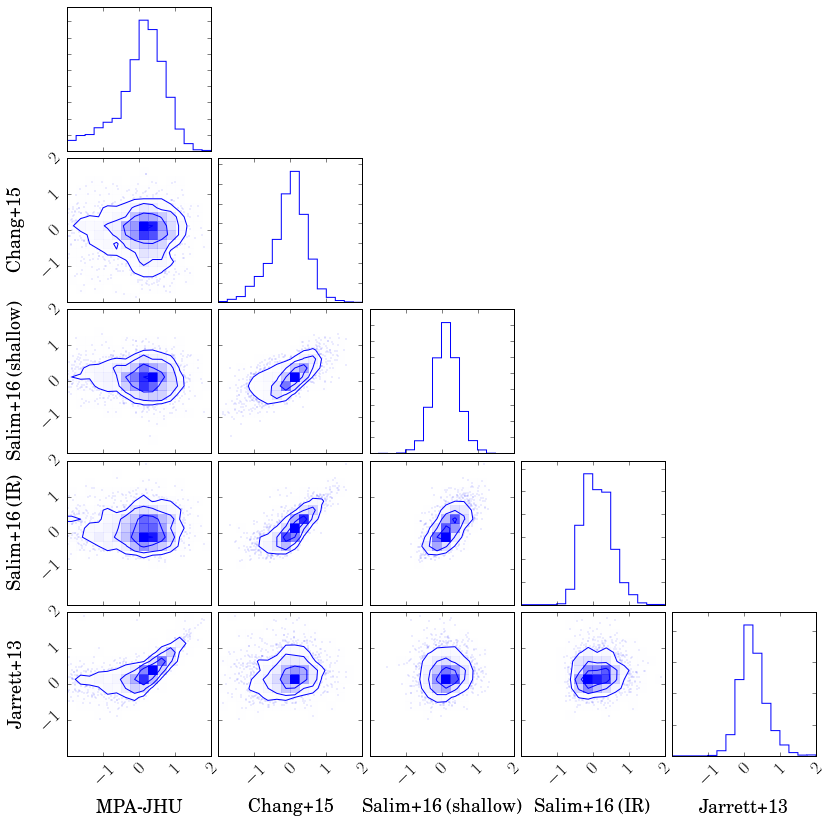

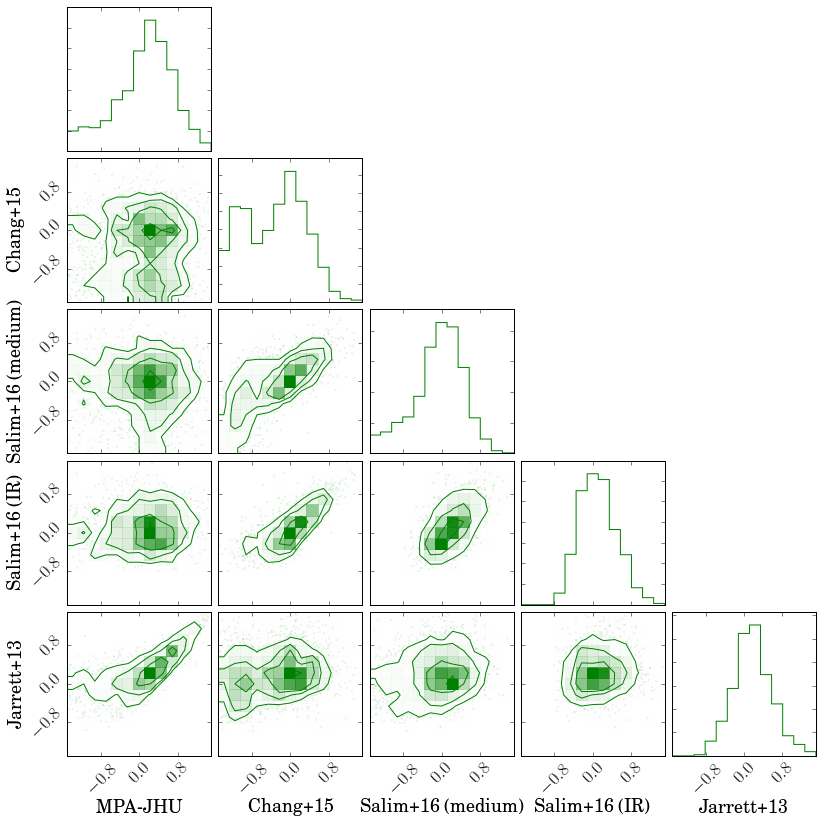

In [41]:
# Now for the SFRs:
#--------------------- Shallow depth -------------------------

ok_all = ((in_sample) & 
          (masks['mpa']) & 
          (masks['chang']) & 
          (masks['s16_shallow']) & 
          (masks['j13']))

print('{} galaxies X-matched'.format(np.sum(ok_all)))

xs = (np.array([sfrs['chang'],sfrs['mpa'],sfrs['s16_shallow'],
                sfrs['s16_shallow_wise'],sfrs['j13']]).T)[ok_all]
ranges = [(-2,2),(-2,2),(-2,2),(-2,2),(-2,2)]
bins = [16,16,16,16,16]
labels = ['MPA-JHU','Chang+15','Salim+16 (shallow)','Salim+16 (IR)','Jarrett+13']
_ = corner(xs,range=ranges,bins=bins,color='b',labels=labels)

#--------------------- Medium depth -------------------------

ok_all = ((in_sample) & 
          (masks['mpa']) & 
          (masks['chang']) & 
          (masks['s16_medium']) & 
          (masks['j13']))

print('{} galaxies X-matched'.format(np.sum(ok_all)))

xs = (np.array([sfrs['chang'],sfrs['mpa'],sfrs['s16_medium'],
                sfrs['s16_medium_wise'],sfrs['j13']]).T)[ok_all]
ranges = [(-1.5,1.5),(-1.5,1.5),(-1.5,1.5),(-1.5,1.5),(-1.5,1.5)]
bins = [13,13,13,13,13]
labels = ['MPA-JHU','Chang+15','Salim+16 (medium)','Salim+16 (IR)','Jarrett+13']
_ = corner(xs,range=ranges,bins=bins,color='g',labels=labels)

2760 galaxies X-matched
2319 galaxies X-matched

/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


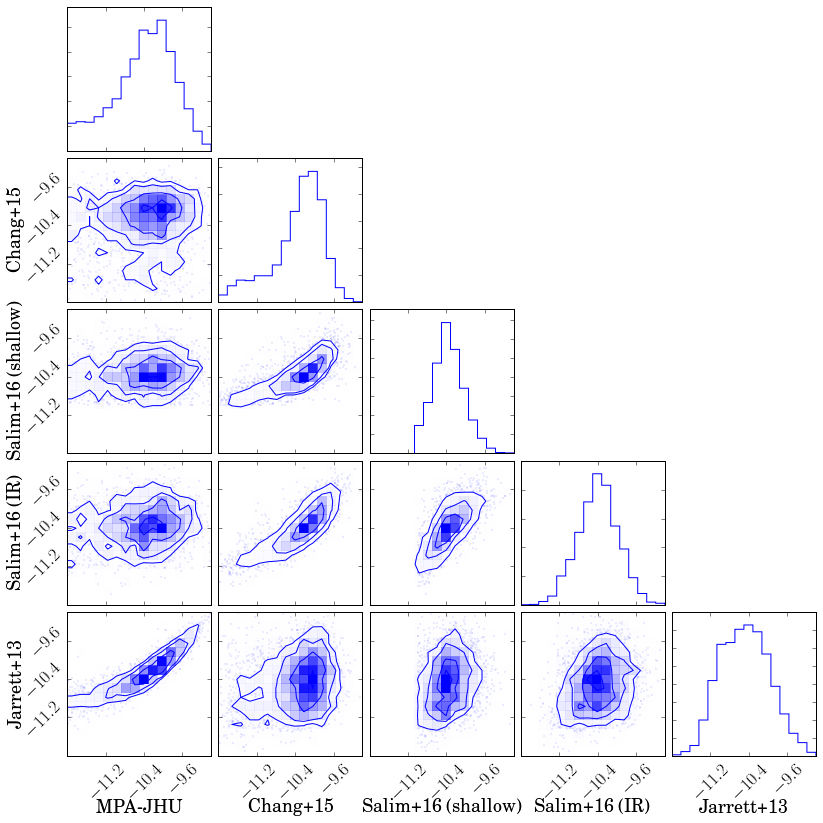

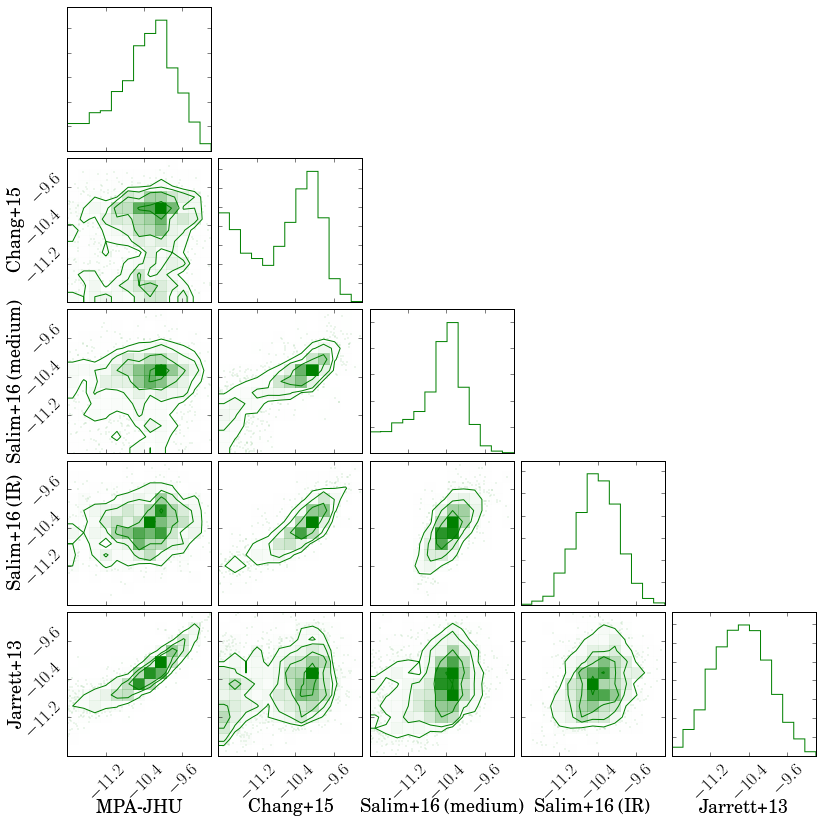

In [42]:
# Finally for the sSFRs:
#--------------------- Shallow depth -------------------------

ok_all = ((in_sample) & 
          (masks['mpa']) & 
          (masks['chang']) & 
          (masks['s16_shallow']) & 
          (masks['j13']))

print('{} galaxies X-matched'.format(np.sum(ok_all)))

xs = (np.array([ssfrs['chang'],ssfrs['mpa'],ssfrs['s16_shallow'],
                ssfrs['s16_shallow_wise'],ssfrs['j13']]).T)[ok_all]
ranges = [(-12,-9),(-12,-9),(-12,-9),(-12,-9),(-12,-9)]
bins = [16,16,16,16,16]
labels = ['MPA-JHU','Chang+15','Salim+16 (shallow)','Salim+16 (IR)','Jarrett+13']
_ = corner(xs,range=ranges,bins=bins,color='b',labels=labels)

#--------------------- Medium depth -------------------------

ok_all = ((in_sample) & 
          (masks['mpa']) & 
          (masks['chang']) & 
          (masks['s16_medium']) & 
          (masks['j13']))

print('{} galaxies X-matched'.format(np.sum(ok_all)))

xs = (np.array([ssfrs['chang'],ssfrs['mpa'],ssfrs['s16_medium'],
                ssfrs['s16_medium_wise'],ssfrs['j13']]).T)[ok_all]
ranges = [(-12,-9),(-12,-9),(-12,-9),(-12,-9),(-12,-9)]
bins = [13,13,13,13,13]
labels = ['MPA-JHU','Chang+15','Salim+16 (medium)','Salim+16 (IR)','Jarrett+13']
_ = corner(xs,range=ranges,bins=bins,color='g',labels=labels)

## Comparison of two SFR estimates for the paper?

In [43]:
chang_in = Table.read('../matched_fits/chang_in_matched.fits')

4120


TypeError: kde_contour() got an unexpected keyword argument 'xy_range'

/home/ppxrh/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


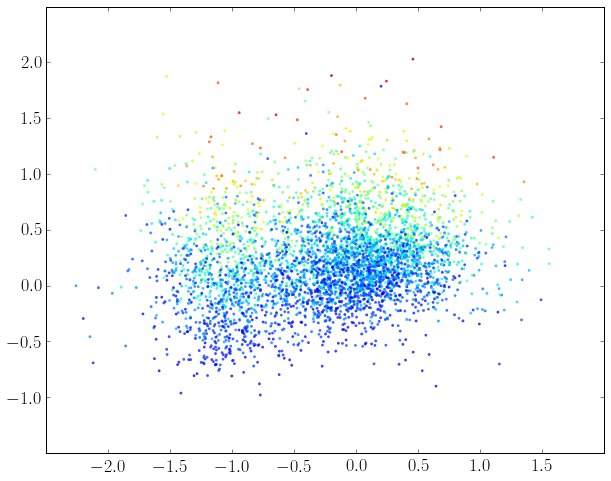

In [44]:
from contours import kde_contour
from scipy.stats import pearsonr

flux_ok = (bad_flux_masks['fuv']) & (bad_flux_masks['w4'])
mpa_ok = sfrs['mpa'] > -3

in_sample = ((samples['in_vmax_limit']) & (mpa_ok) & (flux_ok))

colors = np.log10((chang_in['flux_w4'])[in_sample])
#colors = (sfr_matched['ir'] - sfr_matched['total'])[in_sample]

print(np.sum(in_sample))
xy_range = (-2,2,-2,2)
line_properties = {'linewidth':2,
                   'color':'k'}

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
x = sfrs['mpa'][in_sample]
y = sfrs['j13'][in_sample]
s = plt.scatter(x,y,alpha=0.75,c=colors,zorder=0,lw=0,
            rasterized=True,s=8)
kde_contour(x,y,xy_range=xy_range,line_properties=line_properties,zorder=1)
cbar = plt.colorbar(s)
cbar.set_label('$\log{F(22 \mu m)}$')
plt.axis((-1.5,1.5,-1.5,1.5))
plt.plot([-2,2],[-2,2],'k-')
plt.xlabel(r'$\mathrm{\log(SFR (MPA-JHU))}$')
plt.ylabel(r'$\mathrm{\log(SFR_{FUV} + SFR_{22 \mu m})}$')

plt.text(0.975,0.075,r'$\rho$ = {}'.format(np.round(pearsonr(x,y)[0],decimals=2)),
         transform=ax.transAxes,ha='right',va='bottom')

plt.text(0.975,0.025,'Median scatter = {}'.format(np.round(np.median(np.abs(x-y)),decimals=2)),
         transform=ax.transAxes,ha='right',va='bottom')

#plt.savefig('../output_figures/sfr_measures.pdf')

0.37334714793
median scatter = 0.4729080922192078


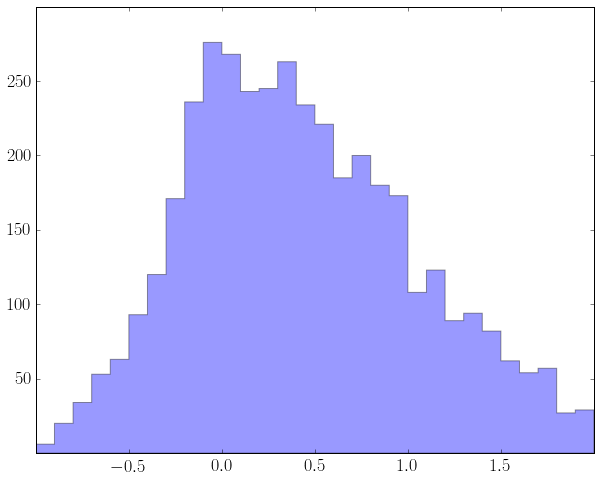

In [45]:
scatter = (sfrs['j13'] - sfrs['mpa'])[in_sample]

_ = plt.hist(scatter,bins=np.linspace(-1,2,31),alpha=0.4,histtype='stepfilled')
print(np.median(scatter))
print('median scatter = {}'.format(np.median(np.abs(scatter))))

In [46]:
in_ml = samples['in_mass_limit']
#gz_data = Table.read('../matched_fits/gz_data.fits')
sizes = gz_data['PETROR50_R'][in_ml]*2
_ = plt.hist(sizes)

np.median(sizes)

NameError: name 'gz_data' is not defined